<a href="https://colab.research.google.com/github/Zeko2005/cap-comp215/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: SIR Epidemiological Model

Name:Ziad Elbadry

Last Updated: 19/2/2024

In [172]:
%matplotlib inline

import math
import random
from timeit import timeit

import matplotlib.pyplot as plt
import networkx as nx

In [173]:
def infection_coin_toss(p=0.5):
    """ Simulate flipping a biased "coin" to find whether the node is going to be infected or not, where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    return random.random() < p

def recovery_coin_toss(p=0.3):
    """Simulating flipping a biased "coin" to find whether the node is going to recover or not, where the probability of "heads" is p. Return True iff "heads", False otherwise """
    return random.random() < p

In [174]:
num_people = 10
average_num_edges = 4
SIRgraph = nx.watts_strogatz_graph(n = num_people, k=average_num_edges, p=0.5)

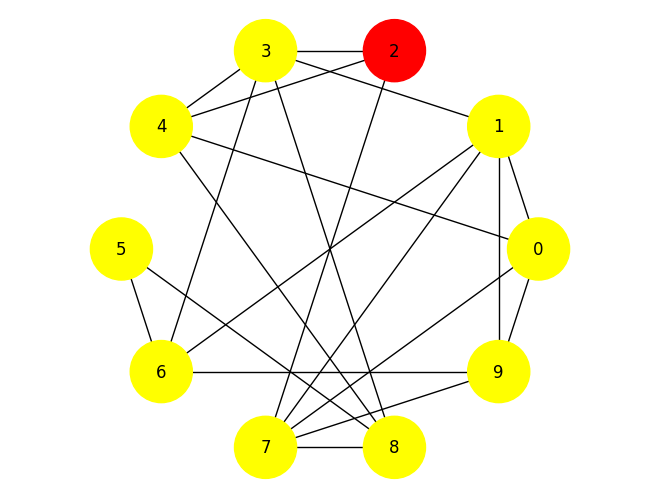

In [175]:
node_colors = ['yellow' for i in range(num_people)]
case0 = random.randint(0, 9)
node_colors[case0] = 'red'
nx.draw_circular(SIRgraph,
                 node_color= node_colors,
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

In [176]:
#S is yellow
#I is red
#R is blue
Infected_cases = set()
Infected_cases.add(case0)
Recovered_cases = set()

In [192]:
def find_num_cases(g, cases):
  """ find the number of cases that could be infected """
  possible_cases = set()
  for i in cases:
    for j in list(g.neighbors(i)):
      possible_cases.add(j)
  print(possible_cases)
  return possible_cases

def step(graph, colors, infect, recover):
  cases = find_num_cases(graph, infect)
  print(cases)
  for i in cases:
    if infection_coin_toss() and i not in recover:
      infect.add(i)
      colors[i] = "red"
  for i in infect:
    if recovery_coin_toss():
      recover.add(i)
      colors[i] = "blue"
  return colors


[9, 7, 4, 1]
[3, 9, 7, 6, 0]
[3, 7, 4]
[2, 4, 1, 6, 8]
[3, 0, 8, 2]
[8, 6]
[1, 3, 5, 9]
[8, 9, 0, 1, 2]
[7, 5, 4, 3]
[0, 7, 1, 6]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
['red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']


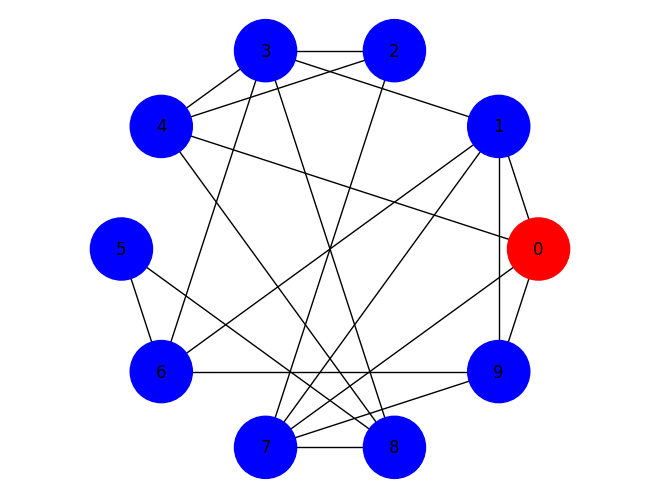

In [201]:
def simulation(n_steps, Graph, ncolor, infected, recovered):
  """ does the simulation for an n number of times """
  for i in range(n_steps):
    return step(Graph, ncolor, infected, recovered)

node_colors = simulation(10000000, SIRgraph, node_colors, Infected_cases, Recovered_cases)

print(node_colors)
nx.draw_circular(SIRgraph,
                 node_color= node_colors,
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()
